####Problem: Given a random sample of observations from a population for which $\mu$ and $\sigma$ are unknown, compute a 95% confidence interval for $\mu$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set(palette="Set2")

In [2]:
#Generate sample
true_mu = 20
sigma_x = 5
N = 50
sample = np.random.normal(true_mu, sigma_x, size=N)

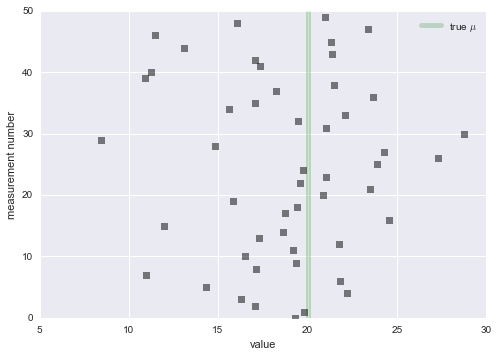

In [43]:
#Plot points
fig, ax = plt.subplots()
ax.errorbar(sample, np.arange(N), fmt='s', color='black', alpha=0.5)
ax.vlines([true_mu], 0, N, linewidth=5, alpha=0.2, color='green', label="true $\mu$")
ax.set_xlabel("value");ax.set_ylabel("measurement number")
plt.legend(loc="upper right");

In this excercise, I am employing the frequentist large sample confidence interval for $\mu$.
  
$$(\bar{X}-z_{\alpha/2}\frac{s}{\sqrt{n}}, \bar{X}+z_{\alpha/2}\frac{s}{\sqrt{n}})$$

In [48]:
def frequentist_interval(sample, alpha):
    """Computes a 100(1-alpha)% confidence interval for the parameter"""
    x_bar = np.mean(sample)
    s = np.std(sample)
    n = len(sample)
    cv_of_z = stats.norm.isf(alpha / 2)
    lower_bound = x_bar - cv_of_z*(s/np.sqrt(n))
    upper_bound = x_bar + cv_of_z*(s/np.sqrt(n))
    return lower_bound, upper_bound

In [6]:
import numpy as np
from scipy import stats
alpha = 0.05
print("A 95% confidence interval for mu computed from the observed sample: [{0:.0f}, {1:.0f}]".format(*frequentist_interval(sample, alpha)))

A 95% confidence interval for mu computed from the observed sample: [19, 22]


To better understand what is meant by this, we compute repeated samplings from the same distribution.
  

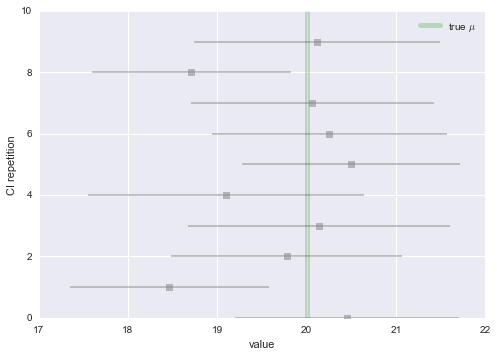

In [47]:
x_bars, std_errs = [], []

for s in range(10):
    sample = np.random.normal(true_mu, sigma_x, size=N)
    x_bar = np.mean(sample)
    s = np.std(sample)
    n = len(sample)
    cv_of_z = stats.norm.isf(alpha / 2)
    x_bars.append(x_bar)
    std_errs.append(cv_of_z*(s/np.sqrt(n)))

#Plot repeated samplings
fig, ax = plt.subplots()
ax.errorbar(x_bars, np.arange(10), fmt='s', xerr=std_errs, color='gray', alpha=0.5)
ax.vlines([true_mu], 0, 10, linewidth=5, alpha=0.2, color='green', label="true $\mu$")
ax.set_xlabel("value");ax.set_ylabel("CI repetition")
plt.legend(loc="upper right");

####We see that of the ten confidence intervals computed, eight of them cover the true value of $\mu$.

####Take note that the 95% confidence interval represents the long-run relative frequency of these intervals crossing the true value of $\mu$.